## Project Description

The commercial department of a telecom operator mega line wants to know which plans among the two prepaid plan they offer brings more revenue in order to adjust advertising budget

**Task: Analyse client’s behaviour and determine which plan brings more revenue** 


**Plans Description:**
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

1. Surf
- Monthly charge: 20 dollars
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: 10 dollars

2. Ultimate
- Monthly charge: 70 dollars
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: 7 dollars


### Data Description


The users table (data on users):
1. user_id — unique user identifier
2. first_name — user's name
3. last_name — user's last name
4. age — user's age (years)
5. reg_date — subscription date (dd, mm, yy)
6. churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
7. city — user's city of residence
8. plan — calling plan name

The calls table (data on calls):
1. id — unique call identifier
2. call_date — call date
3. duration — call duration (in minutes)
4. user_id — the identifier of the user making the call
5. The messages table (data on texts):
6. id — unique text message identifier
7. message_date — text message date
8. user_id — the identifier of the user sending the text

The internet table (data on web sessions):
1. id — unique session identifier
2. mb_used — the volume of data spent during the session (in megabytes)
3. session_date — web session date
4. user_id — user identifier

The plans table (data on the plans):
1. plan_name — calling plan name
2. usd_monthly_fee — monthly charge in US dollars
3. minutes_included — monthly minute allowance
4. messages_included — monthly text allowance
5. mb_per_month_included — data volume allowance (in megabytes)
6. usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
7. usd_per_message — price per text after exceeding the package limits
8. usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

plt.style.use('seaborn')

In [2]:
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
mssges = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

In [3]:
[calls.head(),calls.describe()]

[         id  user_id   call_date  duration
 0   1000_93     1000  2018-12-27      8.52
 1  1000_145     1000  2018-12-27     13.66
 2  1000_247     1000  2018-12-27     14.48
 3  1000_309     1000  2018-12-28      5.76
 4  1000_380     1000  2018-12-30      4.22,
              user_id       duration
 count  137735.000000  137735.000000
 mean     1247.658046       6.745927
 std       139.416268       5.839241
 min      1000.000000       0.000000
 25%      1128.000000       1.290000
 50%      1247.000000       5.980000
 75%      1365.000000      10.690000
 max      1499.000000      37.600000]

##### Calls 

- The minimum call duration is 0 mins which refers to a missed call and maximum duration is 37.6 mins.

In [4]:
[internet.head(),internet.describe()]

[         id  user_id session_date  mb_used
 0   1000_13     1000   2018-12-29    89.86
 1  1000_204     1000   2018-12-31     0.00
 2  1000_379     1000   2018-12-28   660.40
 3  1000_413     1000   2018-12-26   270.99
 4  1000_442     1000   2018-12-27   880.22,
              user_id        mb_used
 count  104825.000000  104825.000000
 mean     1242.496361     366.713701
 std       142.053913     277.170542
 min      1000.000000       0.000000
 25%      1122.000000     136.080000
 50%      1236.000000     343.980000
 75%      1367.000000     554.610000
 max      1499.000000    1693.470000]

##### internet
- the minimum data that has been used is 0 mb and maximum is 1693.47 mb

In [5]:
[mssges.head(),mssges.describe()]

[         id  user_id message_date
 0  1000_125     1000   2018-12-27
 1  1000_160     1000   2018-12-31
 2  1000_223     1000   2018-12-31
 3  1000_251     1000   2018-12-27
 4  1000_255     1000   2018-12-26,
             user_id
 count  76051.000000
 mean    1245.972768
 std      139.843635
 min     1000.000000
 25%     1123.000000
 50%     1251.000000
 75%     1362.000000
 max     1497.000000]

- This data is clean

In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- There are two plans surf and ultimate and the corresponing details.

In [7]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [8]:
[users.head(),users.describe()]

[   user_id first_name  last_name  age                                   city  \
 0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
 1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
 2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
 3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
 4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   
 
      reg_date      plan churn_date  
 0  2018-12-24  ultimate        NaN  
 1  2018-08-13      surf        NaN  
 2  2018-10-21      surf        NaN  
 3  2018-01-28      surf        NaN  
 4  2018-05-23      surf        NaN  ,
            user_id         age
 count   500.000000  500.000000
 mean   1249.500000   45.486000
 std     144.481833   16.972269
 min    1000.000000   18.000000
 25%    1124.750000   30.000000
 50%    1249.500000   46.000000
 75%    1374.250000   61.000000
 max    1499.000000   75.00

##### Users
- The youngest user we have is of 18 years and the oldest one is 75.

In [9]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [10]:
#looking for null values
print('the null values for calls:',calls.isnull().sum())
print('the null values for internet:',internet.isnull().sum())
print('the null values for mssges:',mssges.isnull().sum())
print('the null values for plans:',plans.isnull().sum())
print('the null values for users:',users.isnull().sum())

the null values for calls: id           0
user_id      0
call_date    0
duration     0
dtype: int64
the null values for internet: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
the null values for mssges: id              0
user_id         0
message_date    0
dtype: int64
the null values for plans: messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
the null values for users: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


##### As we can see the only null values are in users['churn_date'] 

### Data Preprocessing

In [11]:
calls['user_id'].duplicated().sum()

137254

In [12]:
users['first_name'] = users['first_name'].str.lower()

In [13]:
users['first_name'].duplicated().sum()

42

In [14]:
users['first_name'].head()

0    anamaria
1      mickey
2      carlee
3    reynaldo
4     leonila
Name: first_name, dtype: object

In [15]:
users['user_id'].duplicated().sum()

0

###### As names can be common and they can have duplicate values so its better to use 'user_id' as it is unique

In [16]:
#Taking month out of the given date
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [17]:
internet['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [18]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [19]:
mssges['month'] = pd.DatetimeIndex(mssges['message_date']).month

- Extracted month from the each date which was given in data.

In [20]:
#Grouping the call data
calls_grouped = calls.groupby(
    by = ['user_id','month'])['duration'].sum().to_frame(name = 'duration').reset_index()

In [21]:
calls_grouped.head()

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [22]:
#Grouping the internet data
internet_grouped = internet.groupby(by = ['user_id','month'])['mb_used'].sum().to_frame(name = 'mb_used').reset_index()

In [23]:
internet_grouped.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [24]:
#Grouping the mssges data
mssges_grouped = mssges.groupby(by = ['user_id','month']).agg({'message_date':'count'})

In [25]:
mssges_grouped.head()

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36

In [26]:
#Converting mb to gb
internet['gb_used'] = internet['mb_used']/1024

In [27]:
internet['gb_used'] = internet['gb_used'].apply(np.ceil)

In [28]:
internet['gb_used'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: gb_used, dtype: float64

- If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.This is the reason to apply np.ceil function.

In [29]:
internet_gb = internet.groupby(by = ['user_id','month'])['gb_used'].sum().to_frame(name = 'gb_used').reset_index()

In [30]:
internet_gb.head()

,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0


In [31]:
#calls in hrs
calls['hrs_duration'] = calls['duration']/60

In [32]:
calls_inhrs = calls.groupby(by = ['user_id','month'])['hrs_duration'].sum().to_frame(name = 'hrs_duration').reset_index()

In [33]:
calls_inhrs.head()

,user_id,month,hrs_duration
0,1000,12,1.947167
1,1001,8,2.852333
2,1001,9,4.961500
3,1001,10,6.235167
4,1001,11,6.743167


In [34]:
#merging the tables
telecom2 = pd.merge(calls_grouped,mssges_grouped,how = 'outer',on = ['user_id','month'])

In [35]:
telecom2.head()

,user_id,month,duration,message_date
0,1000,12,116.83,11.0
1,1001,8,171.14,30.0
2,1001,9,297.69,44.0
3,1001,10,374.11,53.0
4,1001,11,404.59,36.0


In [36]:
telecom2 = pd.merge(telecom2,internet_gb,how = 'outer',on = ['user_id','month'])

In [37]:
telecom2.head()

,user_id,month,duration,message_date,gb_used
0,1000,12,116.83,11.0,4.0
1,1001,8,171.14,30.0,21.0
2,1001,9,297.69,44.0,41.0
3,1001,10,374.11,53.0,50.0
4,1001,11,404.59,36.0,49.0


In [38]:
telecom2 = pd.merge(telecom2,users,how = 'outer',on = 'user_id')

In [39]:
telecom2.head()

,user_id,month,duration,message_date,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,116.83,11.0,4.0,anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,171.14,30.0,21.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,297.69,44.0,41.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,374.11,53.0,50.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,404.59,36.0,49.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [40]:
# Defined a function to find the total revenue for each plan
def total_revenue(row):
    
    #assigning required columns to variables
    plan = row['plan']
    monthly_minutes = row['duration']
    messages = row['message_date']
    internet_usage = row['gb_used']
    
    #separating surf rows 
    if plan == 'surf':
        
        #Calculate revenue for calls (surf plan)
        if monthly_minutes >= 500:
            revenue_calls = (0.03)*(monthly_minutes - 500) 
        else:
            revenue_calls = 0
            
        if messages >= 50:
            revenue_messages = 0.03*(messages - 50)
        else :
            revenue_messages = 0
            
        if internet_usage >= 15:
            revenue_internet_usage = 10*(internet_usage - 15)
        else :
            revenue_internet_usage = 0
 
        cost = 20 + revenue_messages + revenue_internet_usage + revenue_calls
 
 
    #Separate Ultimate rows
    elif plan == 'ultimate':
        
        #calculate revenue for calls (ultimate plan)
        if monthly_minutes >= 3000:
            revenue_calls = (0.01)*(monthly_minutes - 3000) 
        else:
            revenue_calls = 0
            
        if messages >= 1000:
            revenue_messages = 0.01*(messages - 1000)
        else :
            revenue_messages = 0
            
        if internet_usage >= 30:
            revenue_internet_usage = 7*(internet_usage - 30)
        else :
            revenue_internet_usage = 0
 
        cost = 70 + revenue_messages + revenue_internet_usage + revenue_calls
 
    return cost

- Revenue cost according to each plan

In [41]:
#final table
telecom2['total_cost'] = telecom2.apply(total_revenue,axis=1)
telecom2.head()

,user_id,month,duration,message_date,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,116.83,11.0,4.0,anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8.0,171.14,30.0,21.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,80.00
2,1001,9.0,297.69,44.0,41.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,280.00
3,1001,10.0,374.11,53.0,50.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,370.09
4,1001,11.0,404.59,36.0,49.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,360.00


- Merged table containing data of five tables.

In [42]:
telecom2.isnull().sum()

user_id            0
month             10
duration          45
message_date     497
gb_used           26
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date      2143
total_cost         0
dtype: int64

In [43]:
#Filling the missing values
telecom2['message_date']=telecom2['message_date'].fillna(0)
telecom2['duration'] = telecom2['duration'].fillna(1)
telecom2['gb_used'] = telecom2['gb_used'].fillna(0.5)

#### Conclusion
- As messages can be zero so we replaced NaN values with zero.
- The minimum duration of any call will be 1 minute, so we replaced NaN values with 1.
- The data which can be used minimum can be 500mb as streaming services and social networking sites also consumes data while surfing, so replaced NaN values with 0.5.

### Analyze the Data

- Describing the customers' behavior. Finding the minutes, texts, and volume of data the users of each plan require per month. Calculating the mean, dispersion, and standard deviation. Ploting histograms. Describing the distributions.

In [44]:
call_per_user = calls['duration'].round()

In [45]:
#Mean of the calls duration
calls['duration'].mean()

6.7459270337967

In [46]:
#standard deviation
standard_deviation_calls = np.std(calls['duration'])
print('Standard deviation for calls is:',standard_deviation_calls)

Standard deviation for calls is: 5.839219940162848


In [47]:
#changing the data type
call_per_user.astype(int)

0          9
1         14
2         14
3          6
4          4
          ..
137730     9
137731    11
137732     8
137733     0
137734    14
Name: duration, Length: 137735, dtype: int64

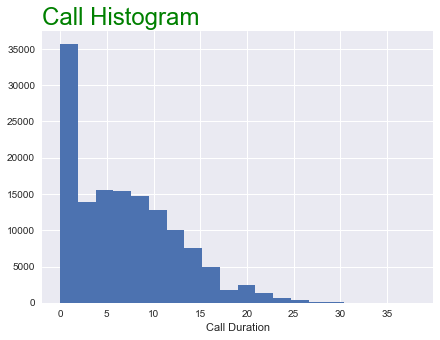

In [48]:
usercalls = call_per_user.hist(bins = 20,grid = True,figsize = (7,5))
usercalls.set_xlabel('Call Duration');
plt.title('Call Histogram',loc = 'left',fontsize=24,color="green" );

- The peak is at zero mins because most of the users prefers talking under 5 mins. There are less users who likes to talk more than 15 mins

In [49]:
text_per_user = mssges_grouped['message_date']

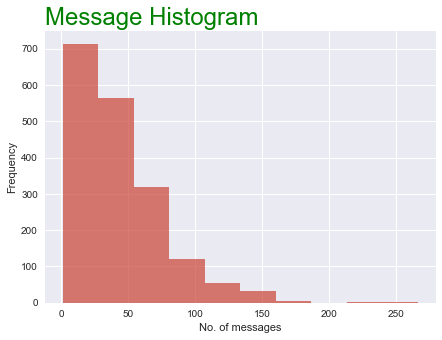

In [50]:
text_hist = text_per_user.plot(kind='hist',grid = True,figsize = (7,5),alpha = 0.7,color = '#CB4335');
text_hist.set_xlabel('No. of messages')
plt.title('Message Histogram',loc = 'left',fontsize=24,color="green" );

- Most of the messages are from 1-50

In [51]:
#mean of text messages
text_per_user.mean()

42.110188261351055

In [52]:
#standard deviation for texts 
standard_deviation_txt = np.std(text_per_user)
print('Standard deviation for texts is:',standard_deviation_txt)

Standard deviation for texts is: 33.113759695003296


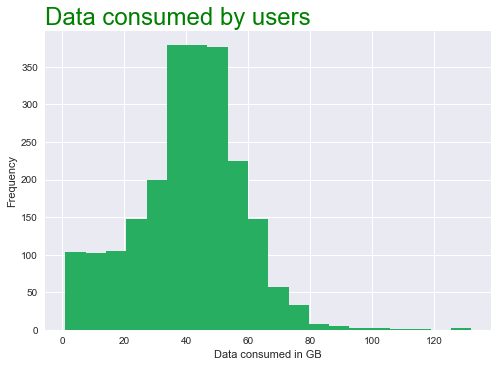

In [53]:
data_hist = internet_gb['gb_used'].plot(kind = 'hist',grid = True,color = '#27AE60',bins = 20);
data_hist.set_xlabel('Data consumed in GB')
plt.title('Data consumed by users',loc = 'left',fontsize=24,color="green" );

- Most of the consumers had used the data between 40 - 60 gb. Data usage is more because nowadays users prefer using internet than any other old school methods.

In [54]:
#Mean of internet used
internet_gb['gb_used'].mean()

40.71980676328502

In [55]:
#Standard deviation for internet
standard_deviation_internet = np.std(internet_gb['gb_used'])
print('Standard deviation for internet is:',standard_deviation_internet)

Standard deviation for internet is: 17.165643147340244


In [56]:
calls.head()

,id,user_id,call_date,duration,month,hrs_duration
0,1000_93,1000,2018-12-27,8.52,12,0.142000
1,1000_145,1000,2018-12-27,13.66,12,0.227667
2,1000_247,1000,2018-12-27,14.48,12,0.241333
3,1000_309,1000,2018-12-28,5.76,12,0.096000
4,1000_380,1000,2018-12-30,4.22,12,0.070333


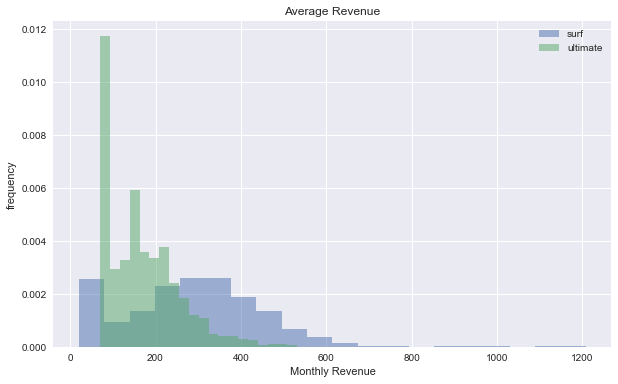

In [57]:
surf_plan = telecom2.query('plan == "surf"')['total_cost']
ultimate_plan = telecom2.query('plan == "ultimate"')['total_cost']
plt.figure(figsize = (10,6))
plt.hist(surf_plan,bins = 20,alpha = 0.5,label = 'surf',density = True)
plt.hist(ultimate_plan,bins = 20,alpha = 0.5,label = 'ultimate',density = True)
plt.xlabel('Monthly Revenue')
plt.ylabel('frequency')
plt.title('Average Revenue')
plt.legend()
plt.show()

###### This is the histogram explaining the average revenue from both the data plans, surf and ultimate. As we can see ultimate has th higher frequency than surf because pricing of ultimate is more than surf. Possible distribution: Normal

Note : 
- Possible distribution was an attempt to guess the distribution. Q-Q plot could be used to test the guess of the distribution (future attempts due to lack of time (; )

In [58]:
#Finding IQR and both lower & upper outlier limit
Q3_dl = telecom2['duration'].quantile(0.75)
Q1_dl = telecom2['duration'].quantile(0.25)
IQR_duration = Q3_dl - Q1_dl
up_duration = Q3_dl + (1.5*IQR_duration)
down_duration = Q1_dl - (1.5*IQR_duration)

In [59]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

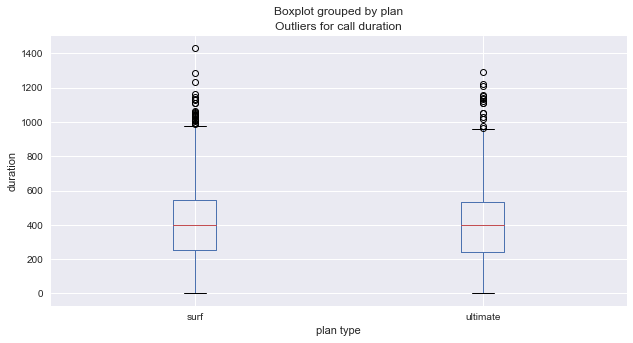

In [60]:
box1 = telecom2.boxplot(column = 'duration',by = 'plan',figsize = (10,5)).set(title='Outliers for call duration', xlabel='plan type', ylabel='duration');


###### For both the plans, most of the calls lasted for a duration less than 1000 minutes

## Test the Hypotheses

###### - Ho = "The average revenue from users of Ultimate and Surf calling plans are not different."
###### - H1 = "The average revenue from users of Ultimate and Surf calling plans are different."

In [61]:
# Wilcoxon-Mann-whitney-Test
from scipy.stats import mannwhitneyu
stat,p = mannwhitneyu(surf_plan,ultimate_plan)
print(('Statistics = %.3f,p = %.5f')% (stat,p))
alpha = 0.05
if p > alpha:
    print('Same distribution')
else:
    print('Different distribution')

Statistics = 316867.500,p = 0.00000
Different distribution


###### Since p-value < alpha, null hypothesis can be rejected. 

###### the plan data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distribution cost of the tariff plan and a random value of plan for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here.

In [62]:
surf_plan.head()

1     80.00
2    280.00
3    370.09
4    360.00
5    420.00
Name: total_cost, dtype: float64

In [63]:
ny_region = telecom2.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').groupby('user_id')['total_cost'].apply(lambda grp : grp.mean())

In [64]:
othr_region = telecom2.query('city != "New York-Newark-Jersey City,NY-NJ-PA MSA"').groupby('user_id')['total_cost']

In [65]:
ny_region = ny_region.astype(int)

In [66]:
othr_region = othr_region.apply(lambda grp: grp.astype(int))

In [67]:
ny_region_smple = ny_region.sample(50)
othr_region_smple = othr_region.sample(50)

###### - Ho = "The average revenue from users in NY-NJ area is not different from that of the users from other regions."
###### - H1 = "The average revenue from users in NY-NJ area is different from that of the users from other regions."

In [68]:
#Wilcoxon-Mannwhitney-Test
from scipy.stats import mannwhitneyu
stat,p = mannwhitneyu(ny_region_smple,othr_region_smple)
print(('Statistics = %.3f,p = %.5f')% (stat,p))
alpha = 0.05
if p > alpha:
    print('Same distribution')
else:
    print('Different distribution')

Statistics = 1218.500,p = 0.41535
Same distribution


- Since p-value > alpha, the null hypotheses cannot be rejected

##### From the average revenue histogram we can see that the revenue data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distributed cost of the tariff plan and a random value of revenue for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here.

- the ny_region data type was float so for better calculations we converted it to int type
- The ny_region and othr_region both had different counts.
- We took same samples from each dataframe to avoid errors in Mannwhitneyu 
- As p-value is small  means that such an extreme observed outcome would be very unlikely under the null hypothesis
-  For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true

# Overall Conclusion

- Most of the data from all five tables was clean,there weren't any null values except churn_date which was not useful
- The data was in different tables so we merged the tables to get the data on single dataframe
- Created a function which can provide the revenue cost according to different plan.
- Rounded the internet gb used because If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes
- Conclusion from histograms
  -The peak is at zero mins because most of the users prefers talking under 5 mins. There are less users who likes to talk more than 15 mins
  -Most of the messages are from 1-50
  -Most of the consumers had used the data between 40 - 60 gb
- The histogram explaining the average revenue from both the data plans, surf and ultimate. As we can see ultimate has the higher frequency than surf because pricing of ultimate is more than surf.
-  the revenue data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distributed cost of the tariff plan and a random value of revenue for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here
- As p-value is small  means that such an extreme observed outcome would be very unlikely under the null hypothesis
-  For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true

##### General Suggestion
- Introducing another plan in between Surf and Ultimate might increase the revenue. 
- Keeping the marketing startegies on Surf plan the same and increasing it for Ultimate plan might help. Some additional offers on Ultimate plan (like extra free data) for soemtime might also help. 
